
# 项目：调查数据集-TMDB电影数据探索

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
>本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。

>本项目分析以下几个问题
<ul>
    <li><a href="#question1">1.每年最受欢迎的电影类别是哪些</a></li>
    <li><a href="#question2">2.票房高的电影有哪些特点</a></li>
    <li><a href="#question3">3.票房的增长趋势是怎样的,人们在电影娱乐方面的消费投入是否呈增长趋势</a></li>
    <li><a href="#question4">4.哪些公司的盈利年增长率最高,选出前5的公司</a></li>
</ul>

In [1]:
# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 电影数据清理,删除不需要用到的列

In [5]:
# 在讨论数据结构和需要解决的任何问题之后，
#   在本部分的第二小部分进行这些清理步骤。
drop_columns=['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','release_date']
df.drop(drop_columns,axis=1,inplace=True)


In [6]:
# 有些票房为0,丢弃这部分数据 
df = df[df['revenue']>0]

In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.000000,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,1.045109,2.956970e+07,8.922066e+07,107.964742,436.215876,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,1.356628,4.051343e+07,1.620684e+08,21.112847,806.416200,0.798795,11.569192,4.375672e+07,1.988419e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.387754,1.700000e+06,7.708081e+06,95.000000,46.000000,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,0.680289,1.500000e+07,3.182654e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,1.210457,4.000000e+07,9.991823e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.to_csv('tmdb-movies-clean.csv',index=False)
df = pd.read_csv('tmdb-movies-clean.csv')

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。
<a id="question1"></a>
### 研究问题 1  每年最受欢迎的电影类别是哪些

按电影类型(用|相隔)进行行拆分
参考资料 https://zhuanlan.zhihu.com/p/28337202


数据整理

In [9]:
#查看都有哪些类型
df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [10]:
#拆分电影类型,使得一条电影记录对应一个类型
df_genres = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres')
df_genres_join = df.drop('genres',axis=1).join(df_genres)
df_genres_join.head()

,popularity,budget,revenue,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000,378436354,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [11]:
df_genres_join.to_csv('tmdb-movies-question_1.csv',index=False)
df_genres_join = pd.read_csv('tmdb-movies-question_1.csv')

分析

In [12]:
def set_plt(title,xlabel,ylabel):
    plt.xlabel(xlabel,fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel(ylabel,fontsize=14)
    plt.yticks(fontsize=12)
    plt.title(title,fontsize=16)

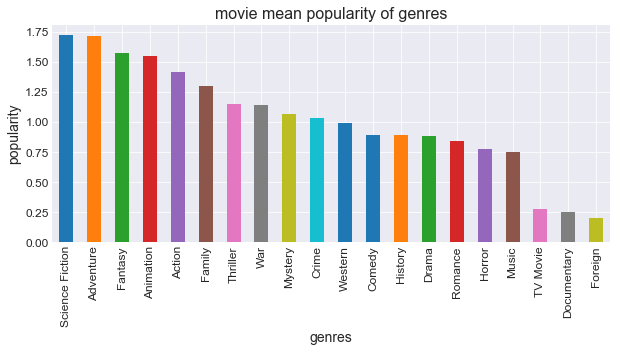

In [13]:
df_mean = df_genres_join.groupby('genres')['popularity'].mean()
df_mean.sort_values(inplace=True,ascending=False)
df_mean.plot(kind='bar',figsize=(10,4))
set_plt('movie mean popularity of genres','genres','popularity')

结论1.受欢迎程度排前三的电影类别为'Adventure', 'Science Fiction', 'Fantasy'

<a id="question2"></a>

### 研究问题 2   票房高的电影有哪些特点

按由高到低分为四部分作比较,需要先清除票房为0的记录


数据整理

In [14]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.000000,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,1.045109,2.956970e+07,8.922066e+07,107.964742,436.215876,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,1.356628,4.051343e+07,1.620684e+08,21.112847,806.416200,0.798795,11.569192,4.375672e+07,1.988419e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.387754,1.700000e+06,7.708081e+06,95.000000,46.000000,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,0.680289,1.500000e+07,3.182654e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,1.210457,4.000000e+07,9.991823e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
#获取分位点 参考 https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html
#分组
bin_names = [ 'low','mid' ,'high' ,'very high' ] 

position = 0
bins = []
for i in range(5):
    position = i/len(bin_names)
    bins.append(df['revenue'].quantile(position))
bins

[2.0, 7708081.25, 31826540.0, 99918234.25, 2781505847.0]

In [16]:
df['revenue_level']=pd.cut(df['revenue'],bins,labels=bin_names)
df.head()

,popularity,budget,revenue,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,very high
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,very high
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,very high
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,very high
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,very high


In [17]:
df.to_csv('tmdb-movies-question_2.csv',index=False)
df = pd.read_csv('tmdb-movies-question_2.csv')

In [18]:
#票房高的电影在类型上的特点
df_very_high = df[df.revenue_level=='very high']
# 把类别拆开
df_genres = df_very_high['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres')
df_genres_very_high = df_very_high.drop('genres',axis=1).join(df_genres)

分析

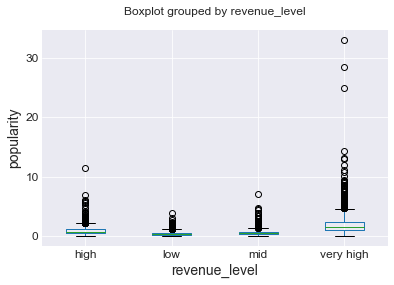

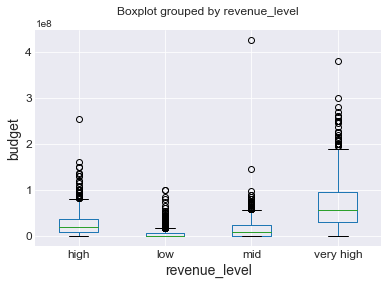

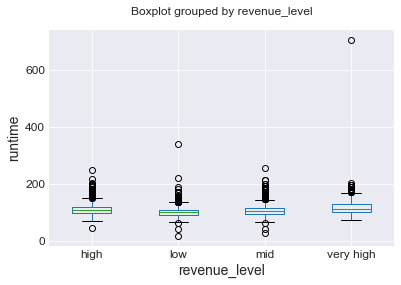

In [19]:
#可视化比较
cloumn_list=['popularity','budget','runtime']
for cloumn_name in cloumn_list:
    df.boxplot(by='revenue_level',column=cloumn_name,fontsize=14),
    set_plt('','revenue_level',cloumn_name)

结论2.1 票房高的电影,有这几个特点,受欢迎程度高,预算高,中心与分布比票房低的都处于较高的部位.在预算的箱形图最高点出现在票房水平为中偏下的组,这说明预算跟收入并不成绝对正比关系

In [20]:
df.to_csv('tmdb-movies-question_2.csv',index=False)
df = pd.read_csv('tmdb-movies-question_2.csv')

In [21]:
df_genres_very_high.head()

,popularity,budget,revenue,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level,genres
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,very high,Action
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,very high,Adventure
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,very high,Science Fiction
0,32.985763,150000000,1513528810,124,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,very high,Thriller
1,28.419936,150000000,378436354,120,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,very high,Action


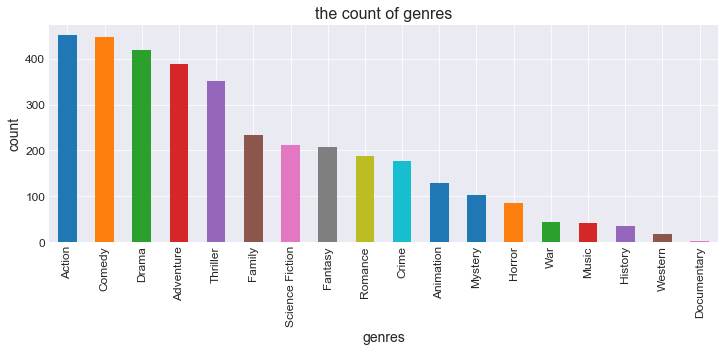

In [22]:
df_genres_very_high['genres'].value_counts().plot(kind='bar',figsize=(12,4),fontsize=12)
set_plt('the count of genres','genres','count')

结论2.2 主要集中在Action,Comedy,Drama,Adventure这几个类别 

<a id="question3"></a>

### 研究问题 3  票房的增长趋势是怎样的,人们在电影娱乐方面的消费投入是否呈增长趋势

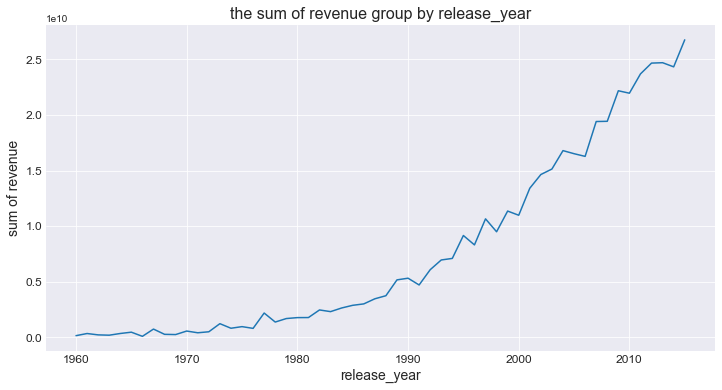

In [23]:
#按发布年份分组,观察票房的增长趋势
df.groupby('release_year')['revenue'].sum().plot(kind='line',figsize=(12,6))
set_plt('the sum of revenue group by release_year','release_year','sum of revenue')

结论3.票房总体上呈正增长趋势,经济发展的同时,人们在娱乐方面的投入随之增加

<a id="question4"></a>

### 研究问题 4.哪些公司的盈利年增长率最高,选出前5的公司

由于部分电影都是几家公司合作拍摄的,在这里假设投入跟收都平均分,有些公司年份缺失,这里只选取有记录的年数不小于4的公司,并且盈利为正的年记录

数据整理

In [24]:
#定义参数 
YEAR_COUNT = 4

In [25]:
#清理null数据 
df_production_companies = df.dropna(axis=0,how='any',inplace=False)
#只选需要用到的列
df_production_companies = df_production_companies.loc[:,['production_companies','release_year','budget','revenue']]

In [26]:
df_production_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 4849
Data columns (total 4 columns):
production_companies    4752 non-null object
release_year            4752 non-null int64
budget                  4752 non-null int64
revenue                 4752 non-null int64
dtypes: int64(3), object(1)
memory usage: 185.6+ KB


计算分析

In [27]:
#计算公司的个数
companies_counts= df_production_companies['production_companies'].apply(lambda x:len(x.split("|")))
#计算平均收入
df_production_companies['revenue_avg'] = df_production_companies['revenue']/companies_counts
#计算平均预算
df_production_companies['budget_avg'] = df_production_companies['budget']/companies_counts 


In [28]:
#拆分制作公司
companies = df_production_companies['production_companies'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('production_companies')
df_production_companies_split = df_production_companies.drop('production_companies',axis=1).join(companies)

In [29]:
#计算每部电影每个公司的盈利
df_production_companies_split['income_avg'] = df_production_companies_split['revenue_avg']-df_production_companies_split['budget_avg']
df_production_companies_split.head()

,release_year,budget,revenue,revenue_avg,budget_avg,production_companies,income_avg
0,2015,150000000,1513528810,302705762.0,30000000.0,Universal Studios,272705762.0
0,2015,150000000,1513528810,302705762.0,30000000.0,Amblin Entertainment,272705762.0
0,2015,150000000,1513528810,302705762.0,30000000.0,Legendary Pictures,272705762.0
0,2015,150000000,1513528810,302705762.0,30000000.0,Fuji Television Network,272705762.0
0,2015,150000000,1513528810,302705762.0,30000000.0,Dentsu,272705762.0


In [30]:
df_production_companies_split.to_csv('df_production_companies_split.csv',index=False)

In [31]:
df_group = df_production_companies_split.groupby(['production_companies','release_year'])
df_group.sum().to_csv('df_production_companies_group.csv',index=True)
df_group = pd.read_csv('df_production_companies_group.csv')
df_group.head()

,production_companies,release_year,budget,revenue,revenue_avg,budget_avg,income_avg
0,"""DIA"" Productions GmbH & Co. KG",2003,36000000,44350926,1.108773e+07,9000000.0,2.087732e+06
1,1019 Entertainment,2015,2000000,2801508,5.603016e+05,400000.0,1.603016e+05
2,10th Hole Productions,2010,8500000,34829670,6.982443e+06,2300000.0,4.682443e+06
3,10th Hole Productions,2013,6000000,1066471,2.132942e+05,1200000.0,-9.867058e+05
4,11:11 Mediaworks,2006,25000000,119188334,5.959417e+07,12500000.0,4.709417e+07


In [32]:
df_group['count_of_release_year'] = ''
df_group['rate'] = 0

In [33]:
#耗时较多,效率欠佳,有很大的改进空间
#计算每个公司的盈利的年增长率:(最大年份的收益/最小年份的收益-1)/(最大年份-最小年份) 收益均大于0
for name,group_companies in df_group.groupby(['production_companies']) :
    count = group_companies.count()[0]
    df_group.loc[group_companies.index,'count_of_release_year']=count
    df_income_avg_lt_zero = group_companies.query('income_avg > 0')
    count = df_income_avg_lt_zero.count()[0]

    if count >= YEAR_COUNT:

        release_year_min = df_income_avg_lt_zero['release_year'].min()
        income_avg_of_min_year = df_income_avg_lt_zero[df_income_avg_lt_zero['release_year']==release_year_min].iat[0, 6]

        release_year_max = df_income_avg_lt_zero['release_year'].max()
        income_avg_of_max_year = df_income_avg_lt_zero[df_income_avg_lt_zero['release_year']==release_year_max].iat[0, 6]

        rate = (income_avg_of_max_year / income_avg_of_min_year - 1)/(release_year_max - release_year_min)
        df_group.loc[group_companies.index,'rate']=rate


In [34]:
#排序
df_group.sort_values(by = ['rate','production_companies'],axis = 0,ascending = False,inplace = True)

In [35]:
#选取增长率最高的前5家公司
rate_5th = df_group['rate'].unique()[4]
df_rate_5th = df_group.query('rate !=""').query('rate >= {}'.format(rate_5th))
print("结论:盈利年增长最快的前5公司")
top_fine = df_rate_5th['production_companies'].unique()
print(top_fine)

结论:盈利年增长最快的前5公司
['Cannon Films' 'Alcon Entertainment' 'Artisan Entertainment'
 'Peninsula Films' 'Gary Sanchez Productions']


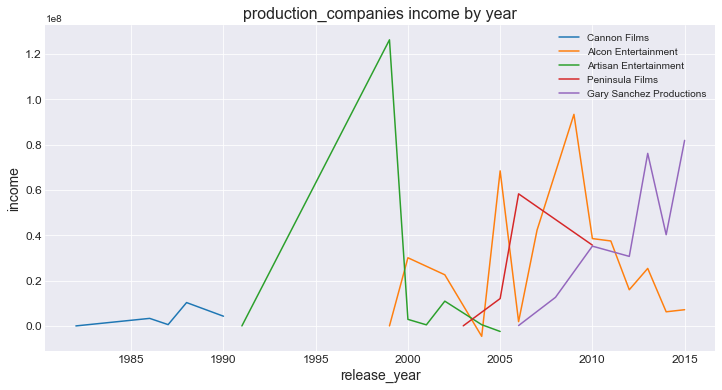

In [36]:
for one_company in top_fine:
    df_one_company = df_rate_5th[df_rate_5th['production_companies']==one_company]
    df_sum = df_one_company.groupby(['release_year'])['income_avg'].sum()
    df_sum.plot(figsize=(12,6),fontsize=14)
    #df_sum.pct_change().plot(figsize=(12,6),fontsize=14)
    
    set_plt('production_companies income by year','release_year','income')
    plt.legend(top_fine)

<a id='conclusions'></a>
## 结论

> **提示**：最后，你需要总结自己的调查结果。请确保你了解在探索过程中的局限性。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相关关系贸然推导出因果关系！

> **提示**：如果你对自己的研究成果感到满意，应将其副本保存为 HTML 或 PDF 形式。在导出报告之前请检查一遍，确保报告结构完整，信息连贯。应删除所有类似的“提示”引用段，以保持报告中的简洁度。在提交之前，你还需要查看在课程结尾的项目提交页面中的项目审阅规范。

> 如需将报告导出到工作区，你可以运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，来提交你的项目。恭喜你！

结论 1.受欢迎程度排前三的电影类别为'Adventure', 'Science Fiction', 'Fantasy',分析思路:由于部分电影同时属于好几种类型,需要先按类型拆分行,再取受欢迎程度的平均值进行比较

结论2.按由高到低分为四部分作比较,需要先清除票房为0的记录 经图表分析可知,票房高的电影,有这几个特点,受欢迎程度高,预算高,主要集中在Action,Comedy,Drama,Adventure这几个类别 

结论3.按发布年份分组,观察票房的增长趋势,
由柱形图可以看出,票房一直在正增长,经济发展的同时,人们在娱乐方面的投入随之增加

结论4:盈利年增长最快的前5公司
'Cannon Films' 'Alcon Entertainment' 'Artisan Entertainment'
 'Peninsula Films' 'Gary Sanchez Productions'

结论准确性分析:
<br/>
1.样本限制分析
<br/>
    由于的数据量只有10866,其中有去除没有票房记录的仅余4850,样本数据量偏小,读者还需要注意的是,统计时间只到2015年
<br/>
    有些电影是多家公司合作的,预算收入只有总的,并没具体分到每家公司,本分析报告取其平均值,这会影响结论4的准确性
    <br/>
2.技术经验限制
<br/>
    本学员在这数据分析方面的经验欠缺,分析技能掌握不广,也会加大结论与真实情况的偏差
    <br/>
    <br/>
    在in[31] 处代码运行时长较长,效率欠佳,期待评审给出指导意见
    <br/>
最后,感谢优达学城的教师们,还有本报告的评审,您的宝贵意见,对我的帮助非常大,谢谢


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-zh.ipynb'])

0